<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Fundamentos de Linguagem Python - Do Básico a Aplicações de IA</font>
# <font color='blue'>Mini-Projeto 4</font>
## <font color='blue'>Limpeza, Engenharia de Atributos e Análise Exploratória de Dados de Vendas com Pandas</font>

## 1. Definição do Problema de Negócio

### 1.1. Contexto 

Uma empresa de e-commerce, em plena fase de crescimento, coleta diariamente um volume significativo de dados transacionais de suas vendas online. Esses dados, provenientes de diversas fontes, são armazenados em um sistema bruto e incluem informações sobre pedidos, clientes, produtos, categorias e status de entrega.

Atualmente, a gestão da empresa enfrenta dificuldades para tomar decisões estratégicas baseadas em dados, pois os relatórios gerados a partir desse sistema bruto são inconsistentes e pouco confiáveis. Tentativas de analisar o desempenho de produtos ou entender o comportamento do consumidor resultaram em conclusões contraditórias, gerando incerteza nas áreas de marketing, estoque e planejamento financeiro.

### 1.2. Problema de Negócio 

A empresa não consegue extrair inteligência de negócio de seus dados de vendas devido à baixa qualidade e à falta de estruturação das informações. Os dados brutos contêm problemas recorrentes, como:

- Dados Faltantes: Pedidos sem registro de quantidade ou status, impedindo um cálculo preciso do faturamento e da eficiência logística.

- Inconsistências e Erros: Formatos de dados incorretos (ex: preços como texto) e erros de digitação que corrompem as análises.

- Informações Duplicadas: Registros de vendas que aparecem mais de uma vez, inflando artificialmente os números de receita e unidades vendidas.

- Valores Discrepantes (Outliers): Dados anômalos que distorcem as médias e as análises estatísticas, levando a uma compreensão equivocada do comportamento padrão de compra.
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->

Essa falta de dados confiáveis impede a empresa de responder a perguntas críticas de negócio, tais como:

- Quais são nossos produtos e categorias mais lucrativos?

- Qual é a nossa tendência de vendas ao longo do tempo?

- Como está a eficiência de nossa operação logística (percentual de entregas, pendências, etc.)?

A incapacidade de responder a essas perguntas resulta em alocação ineficiente de recursos, perda de oportunidades de vendas e dificuldade em planejar o futuro do negócio de forma estratégica.

### 1.3. Objetivos do Projeto 

O objetivo principal deste projeto é transformar os dados brutos de vendas em um ativo confiável e acionável, permitindo que a empresa baseie suas decisões estratégicas em informações precisas.

Para alcançar este objetivo, os seguintes passos serão executados:

- Limpeza e Validação: Implementar um processo para identificar e corrigir as inconsistências nos dados, tratando valores ausentes, removendo duplicatas, corrigindo tipos de dados e lidando com outliers.

- Análise Exploratória de Dados (EDA): Analisar o conjunto de dados limpo para extrair insights iniciais e responder às perguntas de negócio fundamentais.

- Geração de Insights Visuais: Criar um conjunto de visualizações que comuniquem de forma clara e objetiva os principais indicadores de desempenho de vendas.

### 1.4. Critérios de Sucesso 

O projeto será considerado um sucesso quando formos capazes de entregar:

- Um conjunto de dados (dataset) limpo e validado, pronto para ser utilizado em análises futuras.

- Um relatório de análise respondendo com clareza às seguintes questões:

    - O faturamento total e a receita por categoria de produto.

    - A identificação do top 5 produtos mais vendidos em quantidade e em receita.

    - Um gráfico mostrando a tendência de vendas diárias no período analisado.

    - Uma análise da distribuição percentual dos status de entrega (Entregue, Pendente, Cancelado).

O sucesso final será medido pela capacidade da equipe de gestão de utilizar os insights gerados para tomar, com confiança, pelo menos uma decisão de negócio informada (ex: ajustar o estoque do produto mais vendido ou criar uma campanha de marketing para a categoria mais lucrativa).

## 2. Importação das Bibliotecas

In [1]:
# Instala o pacote watermark
!pip install -q -U watermark

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [4]:
%watermark --iversions

matplotlib: 3.10.6
numpy     : 2.3.2
pandas    : 2.3.3
seaborn   : 0.13.2



In [5]:
# Configurando o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Passo 1 - Geração de Dados Sintéticos com Pandas e NumPy

Criamos um DataFrame com dados fictícios que simulam problemas comuns: valores ausentes, tipos de dados incorretos, duplicatas e outliers.

In [6]:
# --- Geração de Dados Fictícios Coerentes ---
print("\nGerando conjunto de dados fictícios...")

# Define a semente para resultados reproduzíveis
np.random.seed(42)

# Criando um dicionário de dados
data = {
    'ID_Pedido': range(1001, 1101),
    'Data_Compra': pd.to_datetime(pd.date_range(start = '2026-07-01', periods = 100, freq ='D')) - pd.to_timedelta(np.random.randint(0, 30, size = 100), unit = 'd'),
    'Cliente_ID': np.random.randint(100, 150, size = 100),
    'Produto': np.random.choice(['Smartphone', 'Notebook', 'Fone de Ouvido', 'Smartwatch', 'Teclado Mecânico'], size = 100),
    'Categoria': ['Eletrônicos', 'Eletrônicos', 'Acessórios', 'Acessórios', 'Acessórios'] * 20,
    'Quantidade': np.random.randint(1, 5, size = 100),
    'Preco_Unitario': [5999.90, 8500.00, 799.50, 2100.00, 850.00] * 20,
    'Status_Entrega': np.random.choice(['Entregue', 'Pendente', 'Cancelado'], size = 100, p = [0.8, 0.15, 0.05])
}

# Criando o dataframe a partir do dicionário
df_vendas = pd.DataFrame(data)

# --- Introduzindo Problemas nos Dados para o Exercício ---
print("\nIntroduzindo problemas nos dados para a limpeza...\n")

# 1. Valores Ausentes (NaN)
df_vendas.loc[5:10, 'Quantidade'] = np.nan
df_vendas.loc[20:22, 'Status_Entrega'] = np.nan
df_vendas.loc[30, 'Cliente_ID'] = np.nan

# 2. Dados Duplicados
df_vendas = pd.concat([df_vendas, df_vendas.head(3)], ignore_index = True)

# 3. Tipos de Dados Incorretos
df_vendas['Preco_Unitario'] = df_vendas['Preco_Unitario'].astype(str)
df_vendas.loc[15, 'Preco_Unitario'] = 'valor_invalido'                   # Simulando um erro de digitação
df_vendas['Cliente_ID'] = df_vendas['Cliente_ID'].astype(str)

# 4. Outliers
df_vendas.loc[50, 'Quantidade'] = 50 # Um valor claramente fora do padrão

print("Dados gerados com sucesso!\n")


Gerando conjunto de dados fictícios...

Introduzindo problemas nos dados para a limpeza...

Dados gerados com sucesso!



In [7]:
# Primeiras linhas
df_vendas.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega
0,1001,2026-06-25,109.0,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado
1,1002,2026-06-13,135.0,Smartwatch,Eletrônicos,3.0,8500.0,Entregue
2,1003,2026-06-05,113.0,Smartwatch,Acessórios,3.0,799.5,Entregue
3,1004,2026-06-20,130.0,Smartwatch,Acessórios,4.0,2100.0,Entregue
4,1005,2026-06-25,147.0,Smartwatch,Acessórios,4.0,850.0,Cancelado


In [8]:
# Últimas linhas
df_vendas.tail()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega
98,1099,2026-09-26,144.0,Fone de Ouvido,Acessórios,4.0,2100.0,Entregue
99,1100,2026-10-07,105.0,Smartphone,Acessórios,1.0,850.0,Entregue
100,1001,2026-06-25,109.0,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado
101,1002,2026-06-13,135.0,Smartwatch,Eletrônicos,3.0,8500.0,Entregue
102,1003,2026-06-05,113.0,Smartwatch,Acessórios,3.0,799.5,Entregue


**Gerar dados com problemas é muito mais fácil do que corrigir os problemas**. Por isso há 2 grupos de pessoas no mundo:

- As que criam problemas!
- As que resolvem problemas!

Fique sempre no segundo grupo, pois a concorrência é muito menor!

## Passo 2 - Análise Exploratória de Dados (EDA)
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
Antes de fazer qualquer modificação vamos inspecionar o DataFrame para entender sua estrutura e identificar os problemas.

In [9]:
# Verificando as informações gerais do DataFrame
print("\n--- Informações Gerais do DataFrame (df_vendas.info()) ---\n")
df_vendas.info()


--- Informações Gerais do DataFrame (df_vendas.info()) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       103 non-null    int64         
 1   Data_Compra     103 non-null    datetime64[ns]
 2   Cliente_ID      103 non-null    object        
 3   Produto         103 non-null    object        
 4   Categoria       103 non-null    object        
 5   Quantidade      97 non-null     float64       
 6   Preco_Unitario  103 non-null    object        
 7   Status_Entrega  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.6+ KB


In [10]:
print("\n--- Verificando valores ausentes ---\n")
print(df_vendas.isna().sum())


--- Verificando valores ausentes ---

ID_Pedido         0
Data_Compra       0
Cliente_ID        0
Produto           0
Categoria         0
Quantidade        6
Preco_Unitario    0
Status_Entrega    3
dtype: int64


In [11]:
print("\n--- Verificando a presença de registros duplicados ---\n")
print(f"Número de linhas duplicadas: {df_vendas.duplicated().sum()}")


--- Verificando a presença de registros duplicados ---

Número de linhas duplicadas: 3


In [12]:
print("\n--- Estatísticas descritivas para colunas numéricas ---\n")
# Usamos o describe() para ter uma noção inicial. Note que Preco_Unitario não aparecerá por ser 'object'.
print(df_vendas.describe())


--- Estatísticas descritivas para colunas numéricas ---

         ID_Pedido                    Data_Compra  Quantidade
count   103.000000                            103   97.000000
mean   1049.087379  2026-08-02 09:33:12.233009664    3.103093
min    1001.000000            2026-06-05 00:00:00    1.000000
25%    1023.500000            2026-07-07 12:00:00    2.000000
50%    1049.000000            2026-07-31 00:00:00    3.000000
75%    1074.500000            2026-08-29 12:00:00    4.000000
max    1100.000000            2026-10-07 00:00:00   50.000000
std      29.733821                            NaN    4.954973


In [13]:
print("\n--- Estatísticas descritivas para colunas categóricas ---\n")
print(df_vendas.describe(include = [object]))


--- Estatísticas descritivas para colunas categóricas ---

       Cliente_ID     Produto   Categoria Preco_Unitario Status_Entrega
count         103         103         103            103            100
unique         46           5           2              6              3
top         114.0  Smartwatch  Acessórios         8500.0       Entregue
freq            5          29          61             21             83


In [14]:
# Verificando as informações gerais do DataFrame
print("\n--- Tipos de dados ---\n")
df_vendas.dtypes


--- Tipos de dados ---



ID_Pedido                  int64
Data_Compra       datetime64[ns]
Cliente_ID                object
Produto                   object
Categoria                 object
Quantidade               float64
Preco_Unitario            object
Status_Entrega            object
dtype: object

## Passo 3 - Limpeza e Pré-Processamento dos Dados
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
Agora, vamos resolver sistematicamente os problemas identificados na etapa de inspeção.

In [15]:
# Copiando o DataFrame para manter o original intacto
df_limpo = df_vendas.copy()

In [16]:
# --- 1. Corrigindo Tipos de Dados ---
print("Corrigindo tipos de dados...")
# Convertendo 'Preco_Unitario' para numérico, tratando erros
# errors='coerce' transformará valores inválidos (como 'valor_invalido') em NaN
df_limpo['Preco_Unitario'] = pd.to_numeric(df_limpo['Preco_Unitario'], errors = 'coerce')

Corrigindo tipos de dados...


In [17]:
# Convertendo 'Cliente_ID' para numérico, tratando erros
df_limpo['Cliente_ID'] = pd.to_numeric(df_limpo['Cliente_ID'], errors = 'coerce').astype('Int64') # Usamos Int64 para permitir NaN

In [18]:
df_limpo.dtypes

ID_Pedido                  int64
Data_Compra       datetime64[ns]
Cliente_ID                 Int64
Produto                   object
Categoria                 object
Quantidade               float64
Preco_Unitario           float64
Status_Entrega            object
dtype: object

**A coluna 'Data_Compra' já está no formato correto (datetime64)!**

In [19]:
# --- 2. Tratando Valores Ausentes (NaN) ---
print("Tratando valores ausentes...")
# Para 'Quantidade', vamos preencher com a mediana, que é mais robusta a outliers
mediana_qtd = df_limpo['Quantidade'].median()
df_limpo.fillna({'Quantidade': mediana_qtd}, inplace = True)

Tratando valores ausentes...


In [20]:
# Para 'Status_Entrega', podemos preencher com o valor mais frequente (moda)
moda_status = df_limpo['Status_Entrega'].mode()[0]
df_limpo['Status_Entrega'] = df_limpo['Status_Entrega'].fillna(moda_status)

In [21]:
# Para 'Preco_Unitario' e 'Cliente_ID', onde o NaN foi gerado por erro ou falta de informação,
# a melhor abordagem é remover as linhas, pois não podemos inferir esses dados.
df_limpo.dropna(subset = ['Preco_Unitario', 'Cliente_ID'], inplace = True)

In [22]:
# --- 3. Removendo Duplicatas ---
print("Removendo registros duplicados...")
df_limpo.drop_duplicates(inplace = True)

Removendo registros duplicados...


Tratando outliers...


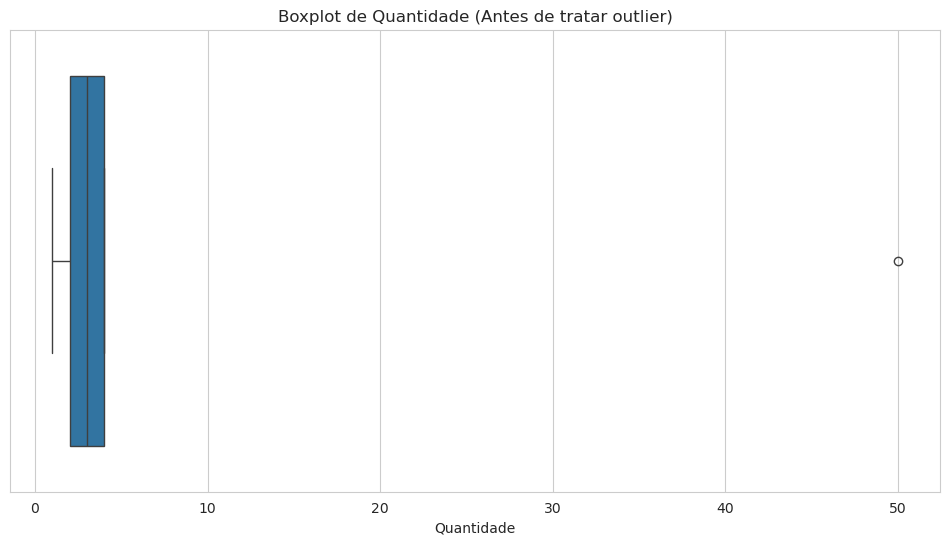

In [23]:
# --- 4. Tratando Outliers ---
# Vamos visualizar o outlier na coluna 'Quantidade'
print("Tratando outliers...")
sns.boxplot(x = df_limpo['Quantidade'])
plt.title('Boxplot de Quantidade (Antes de tratar outlier)')
plt.show()

In [24]:
# Vamos remover valores de 'Quantidade' que estão muito distantes da média.
# Uma abordagem comum é remover valores que estão além de 3 desvios padrão da média.
limite_superior = df_limpo['Quantidade'].mean() + 3 * df_limpo['Quantidade'].std()
df_limpo = df_limpo[df_limpo['Quantidade'] < limite_superior]

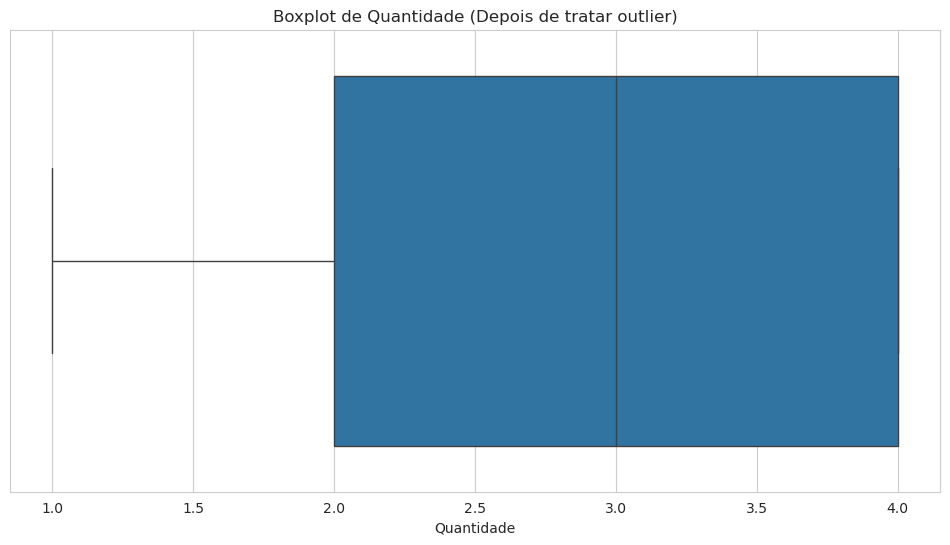

In [25]:
# Verificando o resultado
sns.boxplot(x = df_limpo['Quantidade'])
plt.title('Boxplot de Quantidade (Depois de tratar outlier)')
plt.show()

In [26]:
# --- Verificação Final ---
print("\n--- Verificação Final Pós-Limpeza ---\n")
df_limpo.info()
print("\nValores ausentes restantes:\n", df_limpo.isna().sum())
print(f"\nLinhas duplicadas restantes: {df_limpo.duplicated().sum()}")


--- Verificação Final Pós-Limpeza ---

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       97 non-null     int64         
 1   Data_Compra     97 non-null     datetime64[ns]
 2   Cliente_ID      97 non-null     Int64         
 3   Produto         97 non-null     object        
 4   Categoria       97 non-null     object        
 5   Quantidade      97 non-null     float64       
 6   Preco_Unitario  97 non-null     float64       
 7   Status_Entrega  97 non-null     object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.9+ KB

Valores ausentes restantes:
 ID_Pedido         0
Data_Compra       0
Cliente_ID        0
Produto           0
Categoria         0
Quantidade        0
Preco_Unitario    0
Status_Entrega    0
dtype: int64

Linhas duplicadas restantes: 0


## Passo 4 - Engenharia de Atributos e Extração de Insights

Com os dados limpos, podemos começar a fazer perguntas e extrair insights.

In [27]:
df_limpo.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega
0,1001,2026-06-25,109,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado
1,1002,2026-06-13,135,Smartwatch,Eletrônicos,3.0,8500.0,Entregue
2,1003,2026-06-05,113,Smartwatch,Acessórios,3.0,799.5,Entregue
3,1004,2026-06-20,130,Smartwatch,Acessórios,4.0,2100.0,Entregue
4,1005,2026-06-25,147,Smartwatch,Acessórios,4.0,850.0,Cancelado


In [28]:
# --- Feature Engineering: Criando uma nova coluna 'Total_Venda' ---
df_limpo['Total_Venda'] = df_limpo['Quantidade'] * df_limpo['Preco_Unitario']

In [29]:
df_limpo.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega,Total_Venda
0,1001,2026-06-25,109,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado,5999.9
1,1002,2026-06-13,135,Smartwatch,Eletrônicos,3.0,8500.0,Entregue,25500.0
2,1003,2026-06-05,113,Smartwatch,Acessórios,3.0,799.5,Entregue,2398.5
3,1004,2026-06-20,130,Smartwatch,Acessórios,4.0,2100.0,Entregue,8400.0
4,1005,2026-06-25,147,Smartwatch,Acessórios,4.0,850.0,Cancelado,3400.0


In [30]:
# 1. Qual o total de receita?
receita_total = df_limpo['Total_Venda'].sum()
print(f"A receita total da loja foi de: R$ {receita_total:,.2f}")

A receita total da loja foi de: R$ 928,869.00


In [31]:
# 2. Qual a receita total por categoria de produto?
receita_por_categoria = df_limpo.groupby('Categoria')['Total_Venda'].sum().sort_values(ascending = False)
print("\n--- Receita Total por Categoria ---\n")
print(receita_por_categoria)


--- Receita Total por Categoria ---

Categoria
Eletrônicos    733495.0
Acessórios     195374.0
Name: Total_Venda, dtype: float64


In [32]:
# 3. Qual o produto mais vendido em quantidade?
produto_mais_vendido = df_limpo.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False)
print("\n--- Total de Unidades Vendidas por Produto ---\n")
print(produto_mais_vendido)


--- Total de Unidades Vendidas por Produto ---

Produto
Smartphone          84.0
Fone de Ouvido      61.0
Smartwatch          59.0
Notebook            32.0
Teclado Mecânico    20.0
Name: Quantidade, dtype: float64


In [33]:
# 4. Análise de vendas ao longo do tempo
# Agrupando as vendas por dia
vendas_por_dia = df_limpo.set_index('Data_Compra').resample('D')['Total_Venda'].sum()
print("\n--- Resumo de Vendas por Dia (Primeiros 5 dias) ---\n")
print(vendas_por_dia.head())


--- Resumo de Vendas por Dia (Primeiros 5 dias) ---

Data_Compra
2026-06-05     2398.5
2026-06-06        0.0
2026-06-07        0.0
2026-06-08        0.0
2026-06-09    25500.0
Freq: D, Name: Total_Venda, dtype: float64


## Passo 5 - Visualização dos Dados e Análise

Gráficos são essenciais para comunicar os resultados da análise.

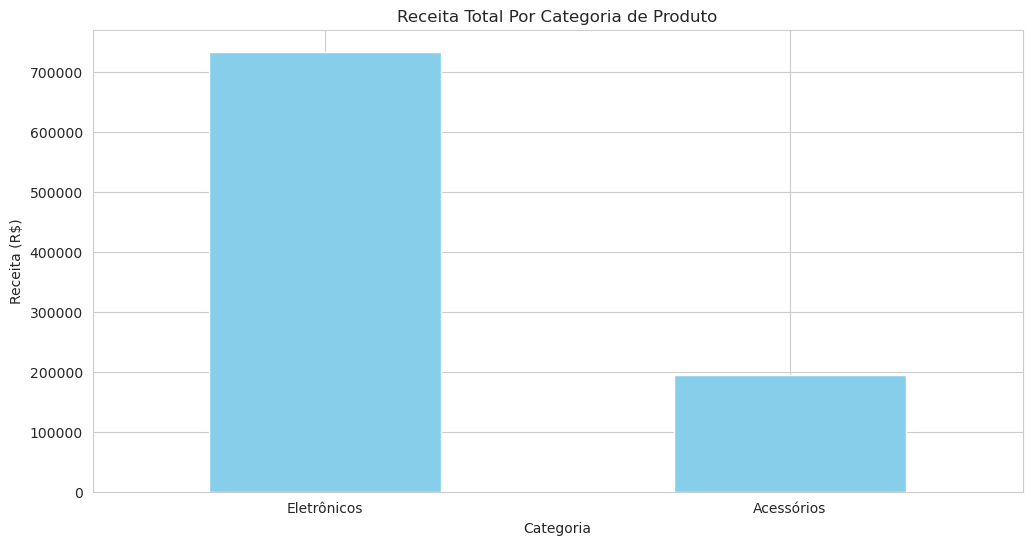

In [34]:
# Gráfico 1: Receita por Categoria
receita_por_categoria.plot(kind = 'bar', color = 'skyblue')
plt.title('Receita Total Por Categoria de Produto')
plt.ylabel('Receita (R$)')
plt.xlabel('Categoria')
plt.xticks(rotation = 0)
plt.show()

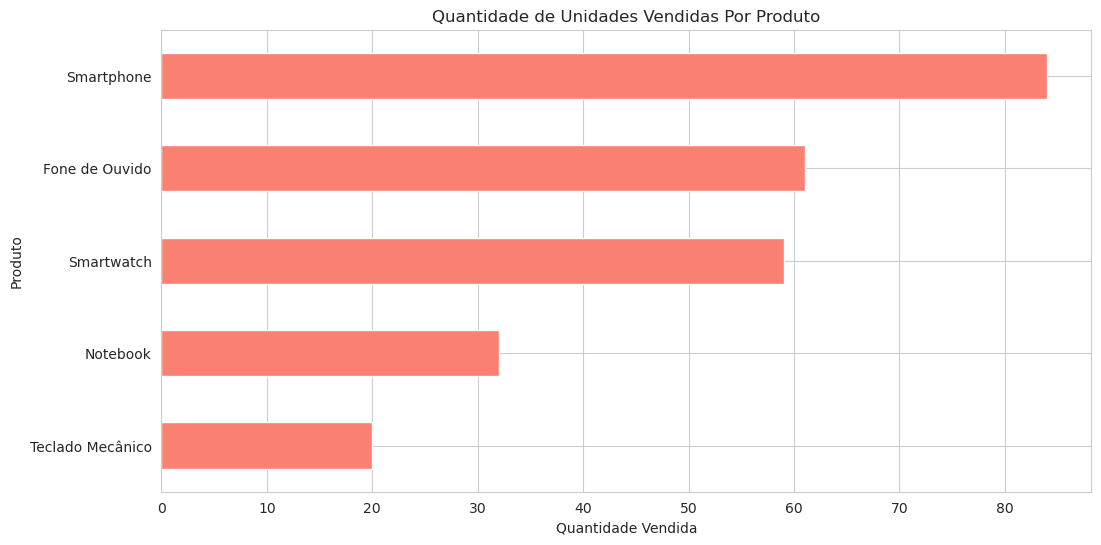

In [35]:
# Gráfico 2: Quantidade Vendida por Produto
produto_mais_vendido.plot(kind = 'barh', color = 'salmon')
plt.title('Quantidade de Unidades Vendidas Por Produto')
plt.ylabel('Produto')
plt.xlabel('Quantidade Vendida')
plt.gca().invert_yaxis() # Inverte o eixo para o maior valor ficar no topo
plt.show()

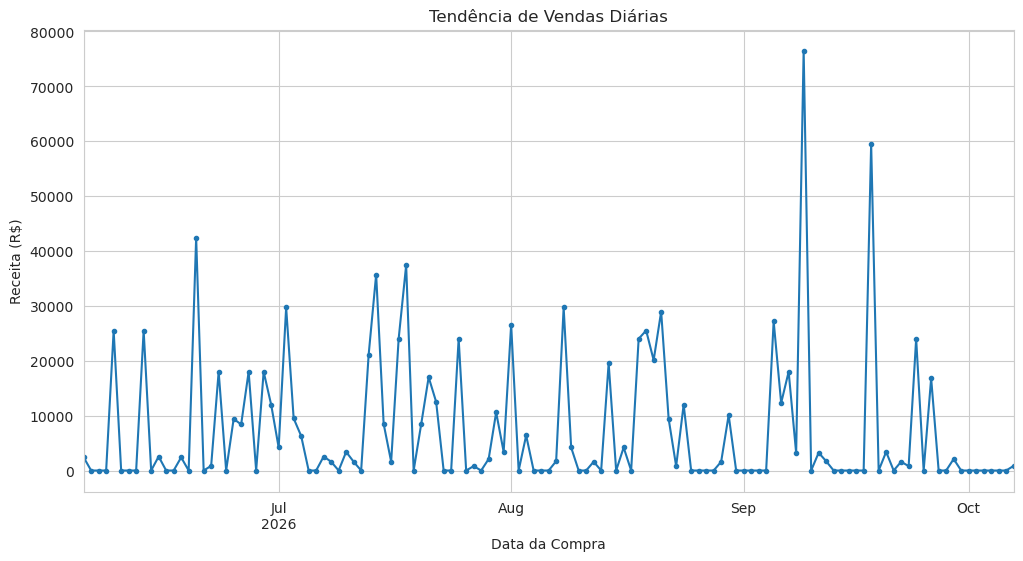

In [36]:
# Gráfico 3: Tendência de Vendas ao Longo do Tempo
vendas_por_dia.plot(kind = 'line', marker = '.', linestyle = '-')
plt.title('Tendência de Vendas Diárias')
plt.ylabel('Receita (R$)')
plt.xlabel('Data da Compra')
plt.grid(True)
plt.show()

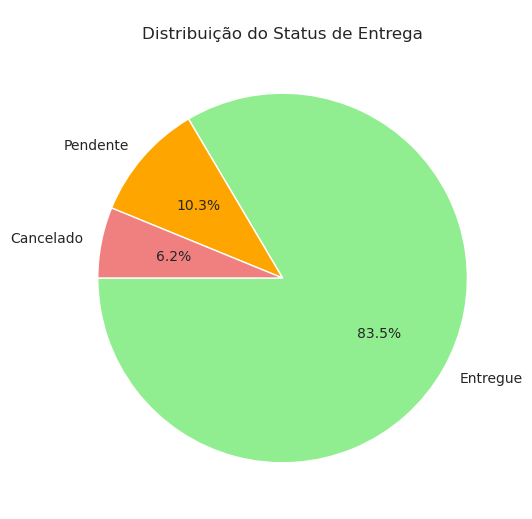

In [37]:
# Gráfico 4: Distribuição do Status de Entrega

# Conta quantas vezes aparece cada status de entrega
status_counts = df_limpo['Status_Entrega'].value_counts()

plt.pie(
    status_counts,                 # Valores numéricos para cada fatia (quantidade de cada status)
    labels = status_counts.index,  # Rótulos de cada fatia (labels dos status)
    autopct = '%1.1f%%',           # Mostra o percentual em cada fatia com 1 casa decimal 
    startangle = 180,              # Ângulo inicial para "girar" o gráfico e escolher onde começa a primeira fatia
    colors = ['lightgreen',        # Cor da primeira fatia
              'orange',            # Cor da segunda fatia
              'lightcoral']        # Cor da terceira fatia
)

plt.title('\nDistribuição do Status de Entrega')  # Título do gráfico
plt.show()                                         # Exibe o gráfico na tela

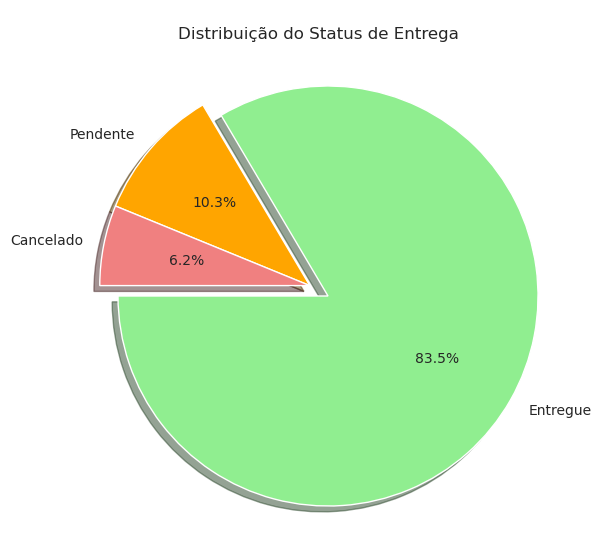

In [38]:
# Gráfico 4: Distribuição do Status de Entrega no formato 3D

# Conta quantas vezes aparece cada status de entrega
status_counts = df_limpo['Status_Entrega'].value_counts()

# Descobre a posição (índice) da fatia com maior valor para destacá-la
maior_idx = status_counts.argmax()

# Cria a lista explode: desloca 0.1 para a maior fatia e 0 para as outras
explode = [0.1 if i == maior_idx else 0 for i in range(len(status_counts))]

# Define o tamanho da figura (6x6 polegadas)
plt.figure(figsize = (6,6))

plt.pie(
    status_counts,                 # Valores numéricos para cada fatia (quantidade de cada status)
    labels = status_counts.index,  # Rótulos de cada fatia (nomes dos status)
    autopct = '%1.1f%%',           # Mostra o percentual em cada fatia com 1 casa decimal 
    startangle = 180,              # Ângulo inicial para "girar" o gráfico e definir onde começa a primeira fatia
    colors = ['lightgreen',        # Cor da primeira fatia
              'orange',            # Cor da segunda fatia
              'lightcoral'],       # Cor da terceira fatia
    explode = explode,             # Desloca a maior fatia para destacá-la visualmente
    shadow = True                  # Adiciona sombra para criar um efeito 3D simples
)

plt.title('\nDistribuição do Status de Entrega\n')  # Define o título do gráfico
plt.axis('equal')                                   # Mantém o formato circular (sem deformações)
plt.show()                                          # Exibe o gráfico

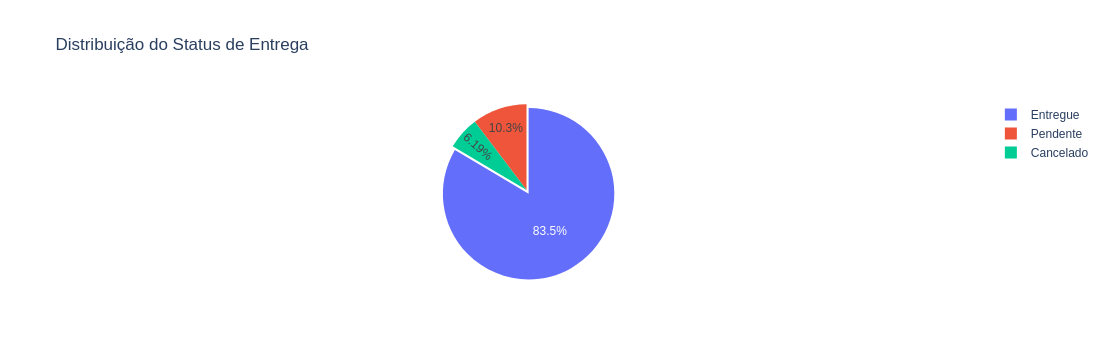

In [39]:
# Gráfico 4: Distribuição dos Status de Entrega com gráfico interativo usando o Plotly

# Importa o pacote Plotly Express para gráficos interativos
import plotly.express as px

# Cria o gráfico de pizza interativo
dsa_fig = px.pie(
    values = status_counts,        # Valores numéricos para cada fatia (quantidade de cada status)
    names = status_counts.index,   # Rótulos de cada fatia (nomes dos status)
    hole = 0,                      # Define o tamanho do "furo" no centro (0 = pizza completa, >0 cria gráfico do tipo donut)
    title = 'Distribuição do Status de Entrega'  # Título exibido no gráfico
)

# Ajusta o destaque das fatias (pull desloca as fatias para fora)
dsa_fig.update_traces(
    pull = [0.05 if i == maior_idx else 0 for i in range(len(status_counts))]
    # Cria uma lista onde a maior fatia é deslocada 0.05 e as outras ficam sem deslocamento
)

# Mostra o gráfico interativo na tela
dsa_fig.show()

## Passo 6 - Como Entregar o Relatório Final

O objetivo principal é contar uma história com os dados. Você deve guiar seu público desde o problema inicial até as soluções recomendadas, usando os dados como evidência.

Veja um exemplo de estrutura para o relatório no manual em pdf do Capítulo 9.

In [40]:
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.10.6
numpy     : 2.3.2
pandas    : 2.3.3
plotly    : 6.3.0
seaborn   : 0.13.2



# Fim